<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/bompally_selfstudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Study 7

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj sometimes they get lucky and have a hit on their hands ( xxmaj wayne 's xxmaj world , the first one , not the second ) . xxmaj but most often they have duds ( xxmaj it 's xxmaj pat comes to mind rather quickly ) . xxmaj this time out it 's xxmaj tim xxmaj meadows as xxmaj the xxmaj ladies xxmaj man . xxmaj this movie falls somewhere in between a hit and a dud . xxmaj it was very funny for the first 20 minutes , but then , as usually happens with xxup snl skits , it starts to slow down , before finally ending , long after it should have . 
 
  xxmaj tim xxmaj meadows is xxmaj leon xxmaj phelps , a radio xxup dj with a xxunk show called xxmaj the xxmaj ladies xxmaj man . xxmaj he answers any and all questions dealing with sex and relationships , usually in the crudest way possible . xxmaj everything seems to ultimately come down to the butt . xxmaj after pushing the xxunk of the station manager , xxmaj leon , along with his producer xxmaj julie ( xxmaj xxunk xxmaj xxunk 

In [12]:
data.train_ds[0][0].data[:10]

array([   2,    4,  490,   44,   97, 2205,   11,   41,   12,  512])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs=48

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,"of the 2 sides to a story and how the lowest rank are always the ones that take the fall . xxmaj nobody above a xxmaj staff xxmaj sargent was ever charged , that 's non - commissioned officer 's . xxmaj imagine that ? ! xxmaj this is a very revealing portrait that shows just how screwed up the military can be in times of war & in general"
1,"thugs related to his late father . xxmaj will tracks down xxmaj miro but ends up falling in love with xxmaj miro 's mother , xxmaj amira ( xxmaj juliette xxmaj binoche ) a soundless - piano playing seamstress . \n \n xxmaj need some xxmaj xxunk ? xxmaj that 's only about half of the movie and i have n't even mentioned xxmaj will 's depressed light -"
2,"and fragile . xxmaj scott xxmaj bakula ... ah ... he just gets better and more seasoned with every new role he takes on : compassionate and kind , but stern and demanding when needed . \n \n xxmaj the relationships before she met xxmaj bo were as heartbreaking in the movie as in the book . xxmaj though i could n't decide if the one she had with"
3,"sad , uplifting , absorbing . xxmaj good acting , good writing . xxmaj lots of meaning , lots of symbolism , but never in your face , never tiring . xxmaj mystical stuff that 's presented well and believably . a movie at once so ambitious and so real and so well - done ... there just are n't very many in its league . xxmaj action , love"
4,"best comedies and xxup great music as well ! xxmaj the best of the eighties xxunk i do count "" you spin me round "" as one of them ! ) xxmaj this movie pays tribute to a great time period and retains a place in my heart as both sweet / sentimental and roll on the floor funny . xxmaj watch it if you have n't , you will"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


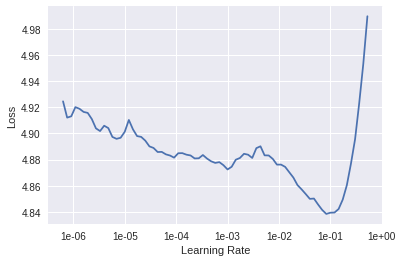

In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.216619,4.059005,0.293155,1:24:05


In [0]:
learn.save('fit_head')

In [25]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos i 'm a proud xxmaj american despite all the people going on vacation saying their xxmaj canadian . ( grow up take some responsibility & know at least xxup some of what 's going on in the world huh ? xxmaj unless your teenager because you are terribly self - centered and ca n't really help it , thanks hormones ! ) xxmaj anyway this is just another example of the 2 sides to a story and how the lowest rank are always the ones that take the fall . xxmaj nobody above a xxmaj staff xxmaj sargent was ever charged , that 's non - commissioned officer 's . xxmaj imagine that ? ! xxmaj this is a very revealing portrait that shows just how screwed up the military can be in times of war & in general . xxmaj the investigator made a couple outstanding points : 1 . if there were never any pictures , we never would have heard of this . 2 . xxmaj the xxmaj colonels / xxmaj generals can be extremely intimidating to

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.883287,3.801356,0.321771,1:33:33


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [31]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because i love movies that i do n't like to do . i did n't like it , but i loved it . i thought it was a good movie , but it had a good story , good story ,
I liked this movie because it was well made . The original was the most beautiful , New York in the Big Apple , even if it was one of the small , and beautiful women in the movie .


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [36]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj some have praised xxunk :- xxmaj the xxmaj lost xxmaj xxunk as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack",neg
"xxbos * * * xxmaj warning - this review contains "" plot spoilers , "" though nothing could "" spoil "" this movie any more than it already is . xxmaj it really xxup is that bad . * * * \n \n xxmaj before i begin , i 'd like to let everyone know that this definitely is one of those so - incredibly - bad - that",neg
"xxbos xxmaj okay , so i 'm not a big video game buff , but was the game xxmaj house of the xxmaj dead really famous enough to make a movie from ? xxmaj sure , they went as far as to actually put in quick video game clips throughout the movie , as though justifying any particular scene of violence , but there are dozens and dozens of games",neg
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",pos


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


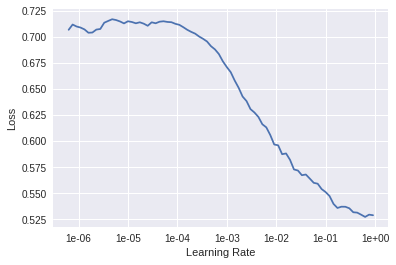

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.347614,0.270374,0.888520,10:40


In [0]:
learn.save('first')

In [42]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj going into a movie like i this , i was expecting absolutely nothing entertaining except for a xxunk of kills xxrep 5 . what i got was even less . 
 
  xxmaj christmas eve 1947 a kid witnesses his parents doing it while daddy is in a santa suit . xxmaj horrified , he runs up the stairs and cuts himself . xxmaj the story begins 33 years later and xxmaj harry xxmaj stalling is your normal everyday joe xxrep 5 . xxunk for the fact he 's obsessed with xxmaj santa . xxmaj after his boss makes fun of him he goes insane , dressing up like santa and starts killing non - santa believing patrons and his boss . xxmaj an unruly neighborhood catches up to him and just as they 're about to torch him , he drives his van off a cliff xxrep 5 . into the moon . xxmaj not the best ending i 've seen but it was original . 
 
  xxmaj it was a slow paced , boring movie that really had no redeeming quality except when xxm

In [43]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.286626,0.219355,0.913200,12:54


In [0]:
learn.save('second')

In [45]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj going into a movie like i this , i was expecting absolutely nothing entertaining except for a xxunk of kills xxrep 5 . what i got was even less . 
 
  xxmaj christmas eve 1947 a kid witnesses his parents doing it while daddy is in a santa suit . xxmaj horrified , he runs up the stairs and cuts himself . xxmaj the story begins 33 years later and xxmaj harry xxmaj stalling is your normal everyday joe xxrep 5 . xxunk for the fact he 's obsessed with xxmaj santa . xxmaj after his boss makes fun of him he goes insane , dressing up like santa and starts killing non - santa believing patrons and his boss . xxmaj an unruly neighborhood catches up to him and just as they 're about to torch him , he drives his van off a cliff xxrep 5 . into the moon . xxmaj not the best ending i 've seen but it was original . 
 
  xxmaj it was a slow paced , boring movie that really had no redeeming quality except when xxm

In [46]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.232162,0.176751,0.932160,18:55


In [0]:
learn.save('third')

In [48]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj going into a movie like i this , i was expecting absolutely nothing entertaining except for a xxunk of kills xxrep 5 . what i got was even less . 
 
  xxmaj christmas eve 1947 a kid witnesses his parents doing it while daddy is in a santa suit . xxmaj horrified , he runs up the stairs and cuts himself . xxmaj the story begins 33 years later and xxmaj harry xxmaj stalling is your normal everyday joe xxrep 5 . xxunk for the fact he 's obsessed with xxmaj santa . xxmaj after his boss makes fun of him he goes insane , dressing up like santa and starts killing non - santa believing patrons and his boss . xxmaj an unruly neighborhood catches up to him and just as they 're about to torch him , he drives his van off a cliff xxrep 5 . into the moon . xxmaj not the best ending i 've seen but it was original . 
 
  xxmaj it was a slow paced , boring movie that really had no redeeming quality except when xxm

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.213888,0.168152,0.936520,24:37


In [51]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([3.6104e-05, 9.9996e-01]))